<Figure size 1000x600 with 0 Axes>

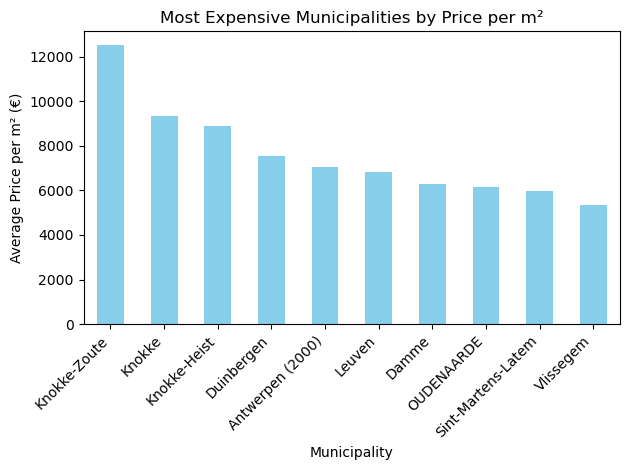

<Figure size 1000x600 with 0 Axes>

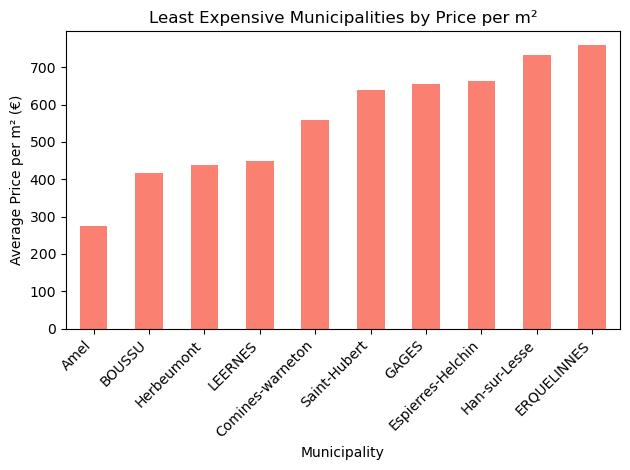

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('new_residential_data.csv')

# Calculating price per square meter for properties that have a valid LivingArea
data['Price_per_m2'] = data['Price'] / data['LivingArea']

# Grouping by Locality (municipality) to get the average, median price, and price per m²
municipality_stats = data.groupby('Locality').agg({
    'Price': ['mean', 'median'],
    'Price_per_m2': 'mean'}).reset_index()

# Renaming columns for clarity
municipality_stats.columns = ['Locality', 'Average_Price', 'Median_Price', 'Avg_Price_per_m2']

# Sorting to get the most and least expensive municipalities
most_expensive_municipalities = municipality_stats.sort_values(by='Avg_Price_per_m2', ascending=False).head(10)
least_expensive_municipalities = municipality_stats.sort_values(by='Avg_Price_per_m2').head(10)

# Plotting Most Expensive Municipalities
plt.figure(figsize=(10, 6))
most_expensive_municipalities.plot(
    kind='bar', 
    x='Locality', 
    y='Avg_Price_per_m2', 
    legend=False, 
    color='skyblue',
    title='Most Expensive Municipalities by Price per m²'
)
plt.ylabel('Average Price per m² (€)')
plt.xlabel('Municipality')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Least Expensive Municipalities
plt.figure(figsize=(10, 6))
least_expensive_municipalities.plot(
    kind='bar', 
    x='Locality', 
    y='Avg_Price_per_m2', 
    legend=False, 
    color='salmon',
    title='Least Expensive Municipalities by Price per m²'
)
plt.ylabel('Average Price per m² (€)')
plt.xlabel('Municipality')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [11]:

qualitative_cols = data.select_dtypes(include=['object']).columns
quantitative_cols = data.select_dtypes(exclude=['object']).columns

# Count qualitative and quantitative variables
qualitative_count = len(qualitative_cols)
quantitative_count = len(quantitative_cols)

# Display the counts of qualitative and quantitative variables
qualitative_count, quantitative_count, qualitative_cols, quantitative_cols


(13,
 19,
 Index(['Region', 'Province', 'District', 'Locality', 'Street', 'PriceType',
        'PropertyType', 'PropertySubtype', 'TypeSale', 'KitchenType',
        'StateBuilding', 'EPCScore', 'ScrapedURL'],
       dtype='object'),
 Index(['Property ID', 'PostalCode', 'Price', 'BedroomCount', 'LivingArea',
        'Furnished', 'Open_fire', 'SwimmingPool', 'Terrace_Area', 'Garden_Area',
        'FacadeCount', 'FloorCount', 'ConstructionYear', 'LandWidth',
        'LandSurface', 'LifeAnnuitySale', 'HasTerrace', 'HasGarden',
        'Price_per_m2'],
       dtype='object'))

In [28]:
# Calculate price per square meter for each property
data['Price_per_m2'] = data['Price'] / data['LivingArea']

# Group by municipality (Locality) to get average and median price and price per m²
municipality_stats = data.groupby('Province').agg(
    avg_price=('Price', 'mean'),
    median_price=('Price', 'median'),
    avg_price_per_m2=('Price_per_m2', 'mean')
).sort_values(by='avg_price_per_m2', ascending=False)

# Split into regions (Belgium, Wallonia, Flanders) based on available Region data
most_expensive_belgium = municipality_stats.head(5)
least_expensive_belgium = municipality_stats.tail(5)

# Display the results
most_expensive_belgium, least_expensive_belgium



(                     avg_price  median_price  avg_price_per_m2
 Province                                                      
 Brussels         542871.759812      375000.0       3576.490551
 West Flanders    460937.175549      339000.0       3411.648865
 Flemish Brabant  502342.717532      445000.0       2999.833066
 Walloon Brabant  544667.737705      450000.0       2949.622926
 Antwerp          412993.636511      349000.0       2754.756923,
                 avg_price  median_price  avg_price_per_m2
 Province                                                 
 Limburg     347416.144828      319000.0       2265.128680
 Luxembourg  400445.285714      294000.0       2115.561202
 Liège       281375.904348      249900.0       2030.355149
 Namur       309628.205128      262000.0       1813.539105
 Hainaut     277490.926941      220000.0       1588.433210)

In [19]:

# Calculate the average price per square meter for each region
region_stats = data.groupby('Region').agg(
    avg_price_per_m2=('Price_per_m2', 'mean'),
    median_price_per_m2=('Price_per_m2', 'median')
)



NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

In [25]:
# Split the dataset into apartments and houses
apartments_df = data[data['PropertySubtype'] == 'APARTMENT']
houses_df = data[data['PropertySubtype'] == 'HOUSE']

# Display the first few rows of each
print(apartments_df.head())
print(houses_df.head())


    Property ID    Region       Province  District       Locality  PostalCode  \
5      20233131  Brussels       Brussels  Brussels        Ixelles        1050   
6      20226645  Brussels       Brussels  Brussels        Brussel        1000   
8      20240570  Brussels       Brussels  Brussels          Evere        1140   
10     20243133  Flanders  West Flanders    Brugge   Blankenberge        8370   
12     20226743  Brussels       Brussels  Brussels  Brussels City        1000   

                            Street   Price         PriceType PropertyType  \
5   Rue Du Relais - Pleisterstraat  395000  residential_sale    APARTMENT   
6                         Hooikaai  455000  residential_sale    APARTMENT   
8        Avenue de l'Oud-Kapelleke  235000  residential_sale    APARTMENT   
10                      Kerkstraat  189000  residential_sale    APARTMENT   
12                             NaN  650000  residential_sale    APARTMENT   

    ... ConstructionYear   StateBuilding  LandWidt

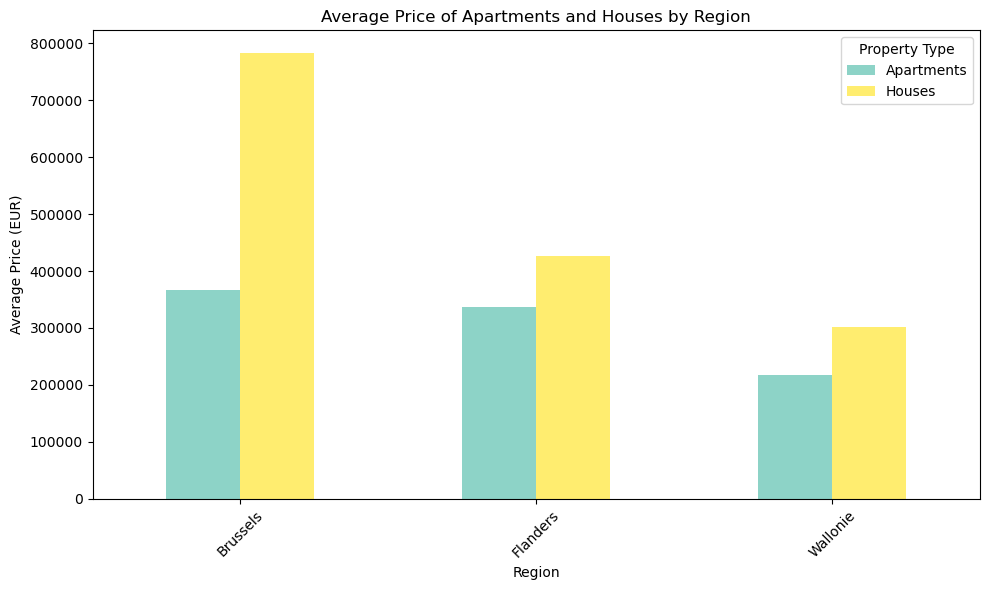

In [27]:
import matplotlib.pyplot as plt

# Step 1: Group by Region and calculate the average price for apartments and houses
apartments_grouped = apartments_df.groupby('Region')['Price'].mean()
houses_grouped = houses_df.groupby('Region')['Price'].mean()

# Step 2: Combine the two dataframes for the plot
combined_grouped = pd.DataFrame({
    'Apartments': apartments_grouped,
    'Houses': houses_grouped
})

# Step 3: Create a grouped bar chart
combined_grouped.plot(kind='bar', figsize=(10, 6), colormap='Set3')
plt.title('Average Price of Apartments and Houses by Region')
plt.xlabel('Region')
plt.ylabel('Average Price (EUR)')
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.tight_layout()
plt.show()


C:\Users\Becode-son\AppData\Local\Temp\ipykernel_11448\2822907416.py:27: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Becode-son\AppData\Local\Temp\ipykernel_11448\2822907416.py:31: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



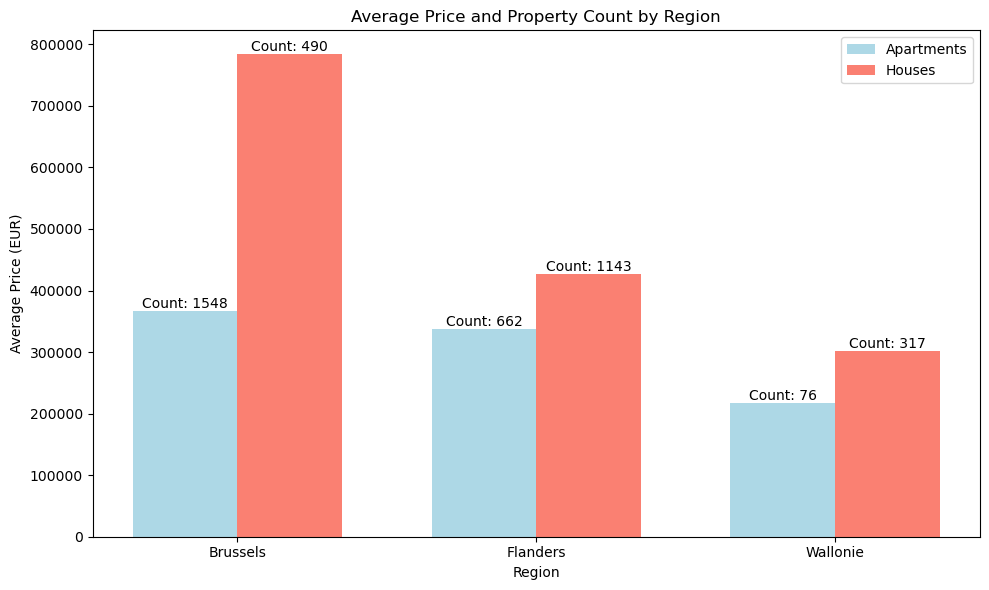

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Group by Region and calculate the average price and number of properties for apartments and houses
apartments_grouped = apartments_df.groupby('Region').agg(Average_Price=('Price', 'mean'), Property_Count=('Price', 'size'))
houses_grouped = houses_df.groupby('Region').agg(Average_Price=('Price', 'mean'), Property_Count=('Price', 'size'))

# Step 2: Combine the data into a single DataFrame
regions = apartments_grouped.index
apartment_avg_price = apartments_grouped['Average_Price']
house_avg_price = houses_grouped['Average_Price']
apartment_count = apartments_grouped['Property_Count']
house_count = houses_grouped['Property_Count']

# Step 3: Create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(regions))

bar1 = ax.bar(index, apartment_avg_price, bar_width, label='Apartments', color='lightblue')
bar2 = ax.bar(index + bar_width, house_avg_price, bar_width, label='Houses', color='salmon')

# Step 4: Add text labels (count) above the bars
for i, rect in enumerate(bar1):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(),
            f'Count: {apartment_count[i]}', ha='center', va='bottom', fontsize=10)

for i, rect in enumerate(bar2):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(),
            f'Count: {house_count[i]}', ha='center', va='bottom', fontsize=10)

# Step 5: Customize the plot
ax.set_xlabel('Region')
ax.set_ylabel('Average Price (EUR)')
ax.set_title('Average Price and Property Count by Region')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(regions)
ax.legend()

plt.tight_layout()
plt.show()


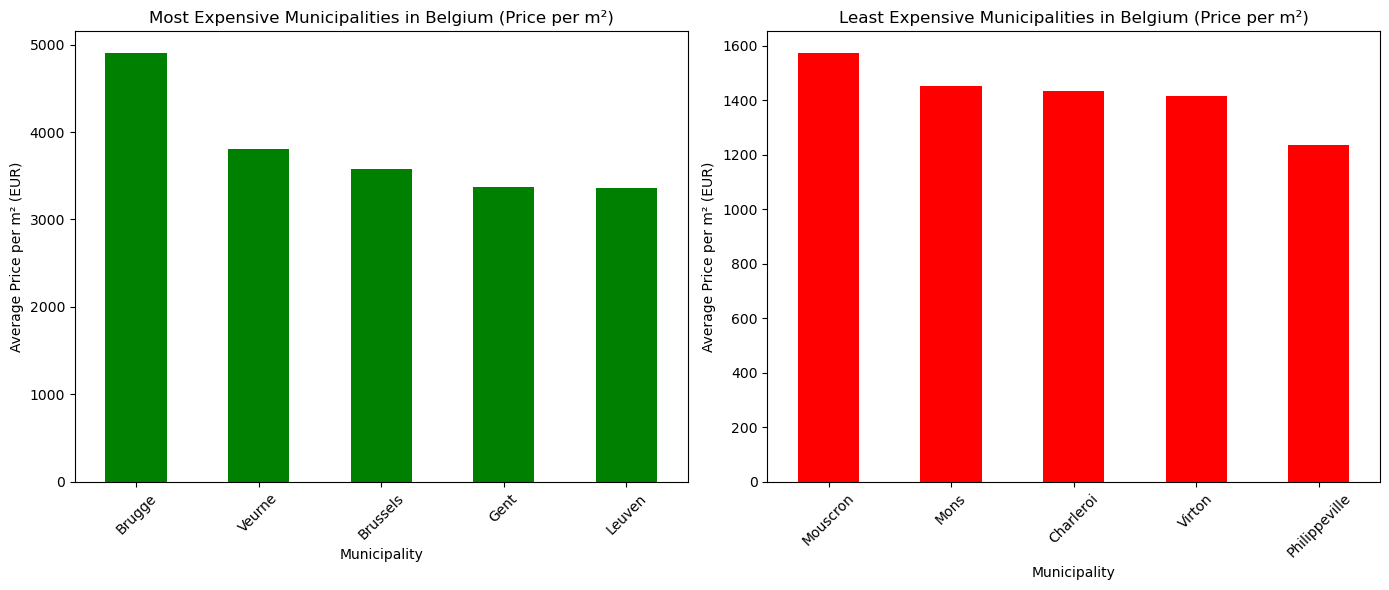

In [34]:
import matplotlib.pyplot as plt

# Step 1: Calculate price per m² (we'll use LivingArea for now)
data['Price_per_m2'] = data['Price'] / data['LivingArea']

# Step 2: Group by 'District' (municipality) and calculate average, median, and average price per m²
municipality_stats = data.groupby('District').agg(
    avg_price=('Price', 'mean'),
    median_price=('Price', 'median'),
    avg_price_per_m2=('Price_per_m2', 'mean')
).sort_values(by='avg_price_per_m2', ascending=False)

# Step 3: Extract the top and bottom 5 municipalities for Belgium
most_expensive_belgium = municipality_stats.head(5)
least_expensive_belgium = municipality_stats.tail(5)

# Step 4: Visualize most and least expensive municipalities (Price per m²)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for most expensive
most_expensive_belgium['avg_price_per_m2'].plot(kind='bar', ax=ax[0], color='green')
ax[0].set_title('Most Expensive Municipalities in Belgium (Price per m²)')
ax[0].set_ylabel('Average Price per m² (EUR)')
ax[0].set_xlabel('Municipality')
ax[0].tick_params(axis='x', rotation=45)

# Plot for least expensive
least_expensive_belgium['avg_price_per_m2'].plot(kind='bar', ax=ax[1], color='red')
ax[1].set_title('Least Expensive Municipalities in Belgium (Price per m²)')
ax[1].set_ylabel('Average Price per m² (EUR)')
ax[1].set_xlabel('Municipality')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


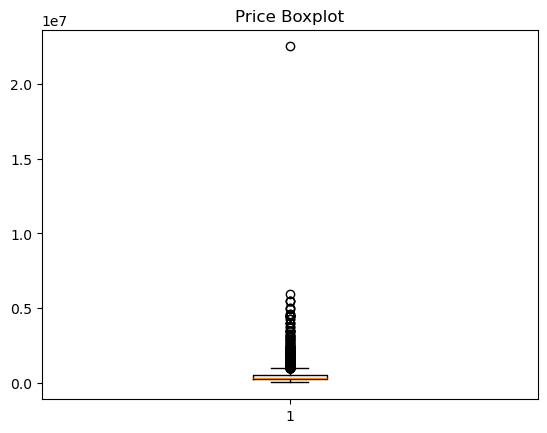

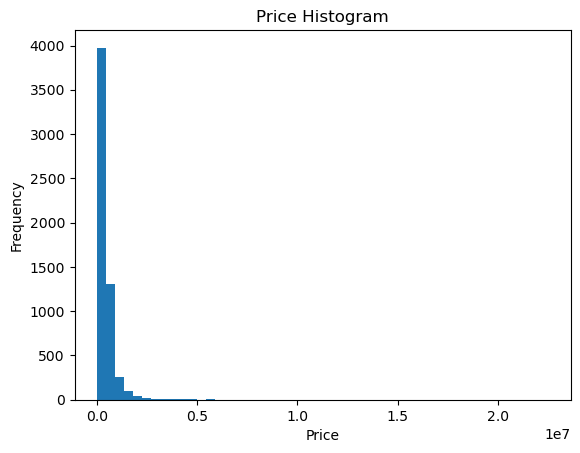

In [37]:
import matplotlib.pyplot as plt

# Visualizing with a boxplot
plt.boxplot(data['Price'])
plt.title('Price Boxplot')
plt.show()

# Visualizing with a histogram
plt.hist(data['Price'], bins=50)
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [43]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Price'] < lower_bound) | (data['Price'] > upper_bound)]

# Print outlier summary
print(f"Number of outliers: {outliers.shape[0]}")


# We could remove rows 
df_cleaned = data[(df['Price'] >= lower_bound) & (data['Price'] <= upper_bound)]


Number of outliers: 419


NameError: name 'df' is not defined

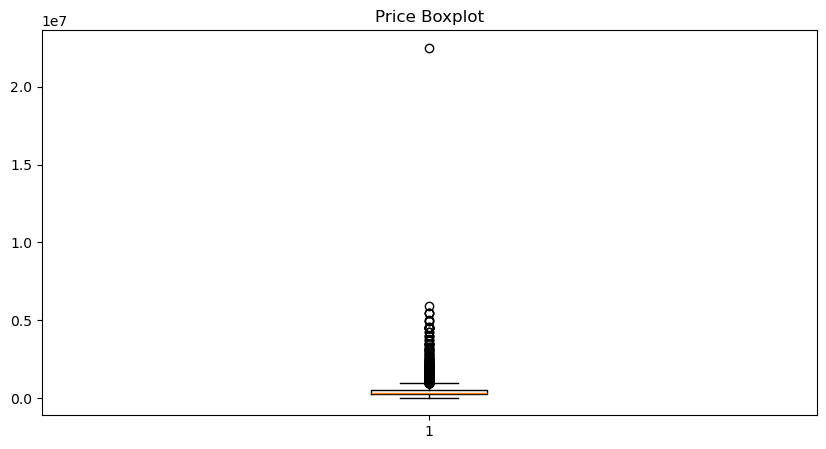

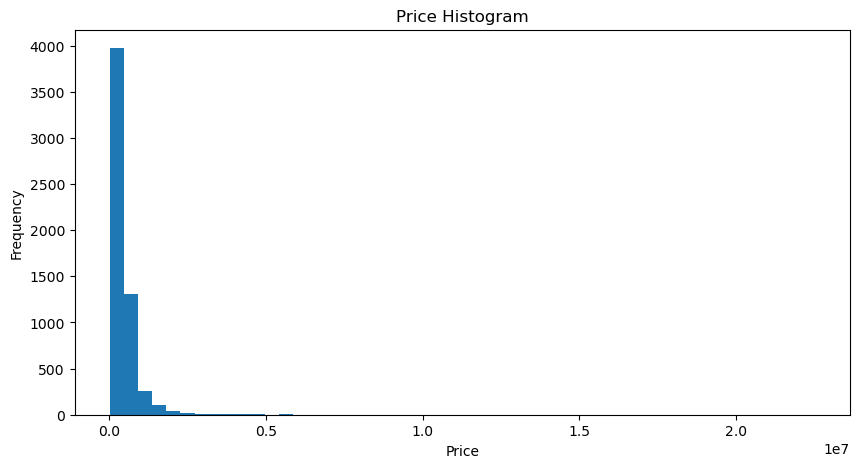

Number of outliers: 419


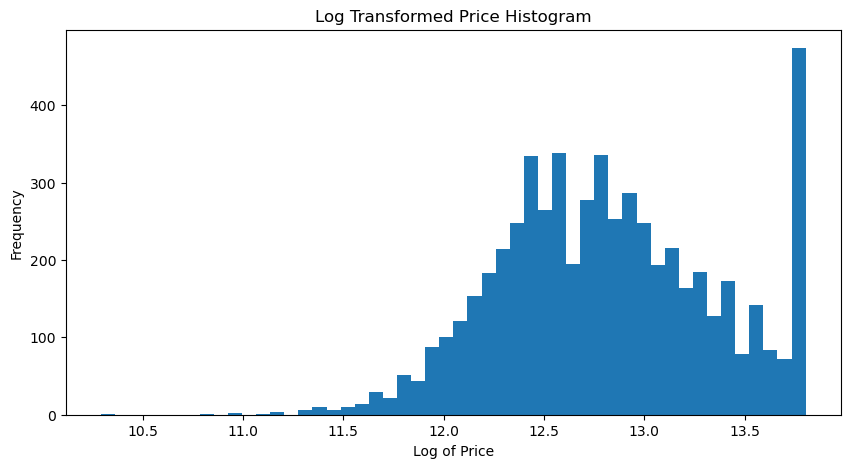

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Visualizing the Price Distribution

# Boxplot to visualize outliers
plt.figure(figsize=(10, 5))
plt.boxplot(data['Price'])
plt.title('Price Boxplot')
plt.show()

# Histogram to understand distribution
plt.figure(figsize=(10, 5))
plt.hist(data['Price'], bins=50)
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Step 2: Detecting Outliers Using the IQR Method

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Price'] < lower_bound) | (data['Price'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

# Step 3: Handling Outliers by Capping and Flooring

# Cap prices above upper bound and floor prices below lower bound
data['Price'] = data['Price'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Step 4: Optional Log Transformation for Highly Skewed Data

# Apply log transformation
data['Log_Price'] = np.log(data['Price'])

# Visualize the transformed price distribution
plt.figure(figsize=(10, 5))
plt.hist(data['Log_Price'], bins=50)
plt.title('Log Transformed Price Histogram')
plt.xlabel('Log of Price')
plt.ylabel('Frequency')
plt.show()


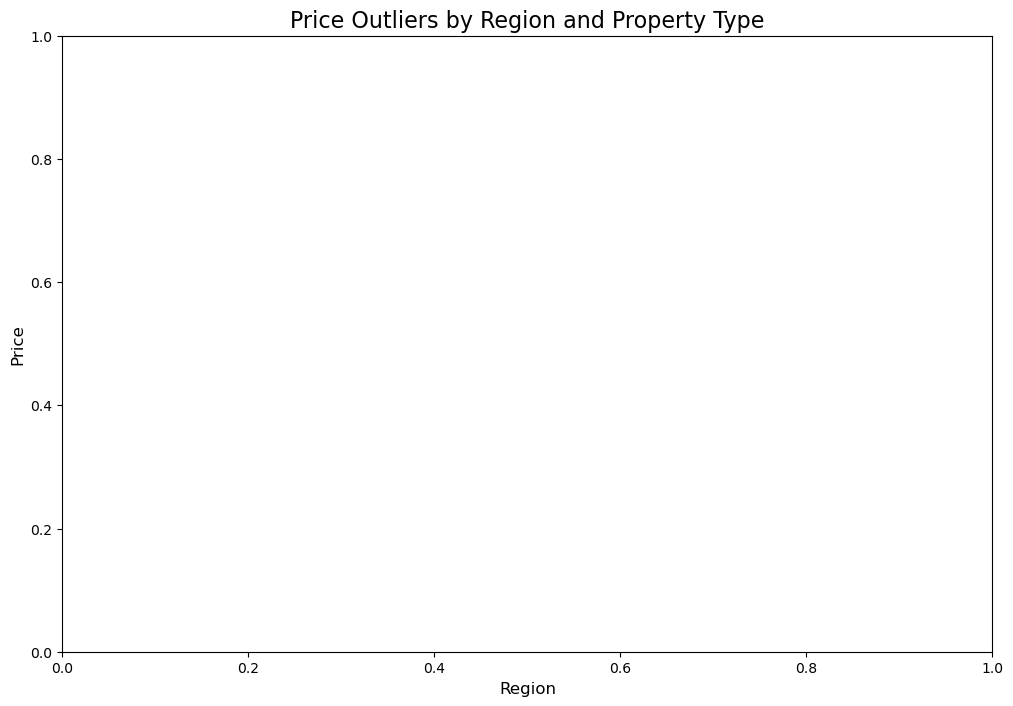

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Detecting outliers using IQR within each region and property type

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(df, price_col):
    Q1 = df[price_col].quantile(0.25)
    Q3 = df[price_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[price_col] < lower_bound) | (df[price_col] > upper_bound)]

# Step 2: Separate data by region and property type

# Filter data by region and property type (House/Apartment)
regions = ['Wallonie', 'Flemish Brabant', 'Brussels']
property_types = ['House', 'Apartment']

# Initialize a list to store dataframes with outliers
outliers_list = []

for region in regions:
    for p_type in property_types:
        # Filter by region and property type
        subset = data[(data['Region'] == region) & (data['PropertyType'] == p_type)]
        outliers = detect_outliers_iqr(subset, 'Price')
        outliers_list.append(outliers)

# Combine all outliers into one dataframe for plotting
outliers_combined = pd.concat(outliers_list)

# Step 3: Plot the outliers for each region and property type using boxplots

plt.figure(figsize=(12, 8))

# Use seaborn to create a boxplot with hue for property type
sns.boxplot(data=outliers_combined, x='Region', y='Price', hue='PropertyType')

# Title and labels
plt.title('Price Outliers by Region and Property Type', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Show the plot
plt.show()


In [50]:
print(outliers_list)

[Empty DataFrame
Columns: [Property ID, Region, Province, District, Locality, PostalCode, Street, Price, PriceType, PropertyType, PropertySubtype, TypeSale, BedroomCount, LivingArea, KitchenType, Furnished, Open_fire, SwimmingPool, Terrace_Area, Garden_Area, FacadeCount, FloorCount, ConstructionYear, StateBuilding, LandWidth, LandSurface, EPCScore, LifeAnnuitySale, ScrapedURL, HasTerrace, HasGarden, Price_per_m2, Log_Price]
Index: []

[0 rows x 33 columns], Empty DataFrame
Columns: [Property ID, Region, Province, District, Locality, PostalCode, Street, Price, PriceType, PropertyType, PropertySubtype, TypeSale, BedroomCount, LivingArea, KitchenType, Furnished, Open_fire, SwimmingPool, Terrace_Area, Garden_Area, FacadeCount, FloorCount, ConstructionYear, StateBuilding, LandWidth, LandSurface, EPCScore, LifeAnnuitySale, ScrapedURL, HasTerrace, HasGarden, Price_per_m2, Log_Price]
Index: []

[0 rows x 33 columns], Empty DataFrame
Columns: [Property ID, Region, Province, District, Locality, 